In [2]:
pip install --upgrade pip 

Note: you may need to restart the kernel to use updated packages.


In [9]:
# install libraries that you do not have installed 
# otherwise skip these steps
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.
     ------------------------------------ 455.9/455.9 MB 393.2 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ------------------------------------ 896.6/896.6 kB 623.3 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 586.1 kB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ------------------------------------ 124.6/124.6 kB 431.5 kB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 kB 669.5 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 517.6 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 593.7 kB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 5.9/5.9 MB 633.9 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57

In [12]:
# code for machine learning model to detect emotions
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# example reading image
img_array = cv2.imread("./data/train/0/Training_33331.jpg")
print(img_array)

[[[136 136 136]
  [168 168 168]
  [222 222 222]
  ...
  [212 212 212]
  [194 194 194]
  [191 191 191]]

 [[135 135 135]
  [185 185 185]
  [224 224 224]
  ...
  [225 225 225]
  [193 193 193]
  [193 193 193]]

 [[144 144 144]
  [206 206 206]
  [224 224 224]
  ...
  [236 236 236]
  [197 197 197]
  [192 192 192]]

 ...

 [[165 165 165]
  [173 173 173]
  [193 193 193]
  ...
  [174 174 174]
  [168 168 168]
  [193 193 193]]

 [[192 192 192]
  [141 141 141]
  [150 150 150]
  ...
  [160 160 160]
  [175 175 175]
  [187 187 187]]

 [[204 204 204]
  [207 207 207]
  [133 133 133]
  ...
  [154 154 154]
  [180 180 180]
  [176 176 176]]]


In [14]:
img_array.shape

(48, 48, 3)

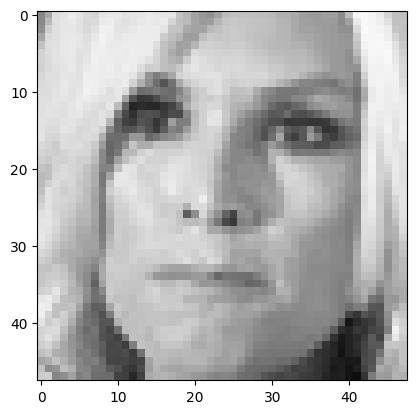

In [15]:
plt.imshow(img_array)

In [16]:
# training dataset
DataDir = "data/train/"

In [17]:
# name of folder corresponds to the labels
Classes = ["0", "1", "2", "3", "4", "5", "6"]

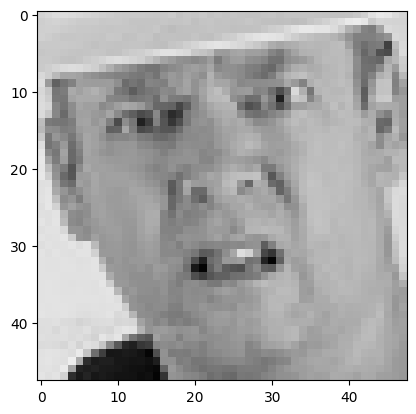

In [18]:

for category in Classes:
    path = os.path.join(DataDir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

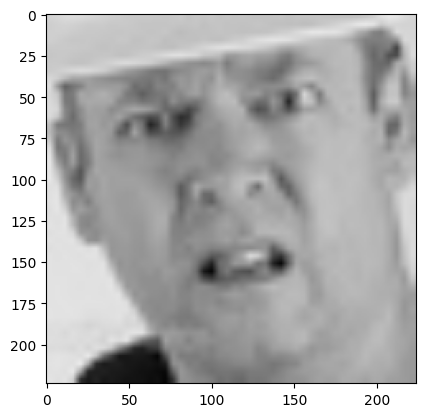

In [19]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show

In [20]:
# for transfer learning we are taking 224x224
new_array.shape

(224, 224, 3)

In [21]:
# read al images and convert them into an array

In [22]:
train_data = []
def training_data_generator():
    for category in Classes:
        path = os.path.join(DataDir, category)
        class_num = Classes.index(category)  ## only two columns for the class
        for img in os.listdir(path):
            try:
                # read all the images and to do so we loop 
                # into the classes (i.e. folders)
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                train_data.append([new_array, class_num])
            except Exception as e:
                pass

In [23]:
training_data_generator()

In [24]:
print(len(train_data))

504


In [25]:
# change  a list into a numpy array 
temp = np.array(train_data)

c:\users\netta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [26]:
temp.shape

(504, 2)

In [27]:
import random
# shuffle so that the machine learning architecture is dynamic and robust
random.shuffle(train_data)

In [28]:
# create training data
X = []
y = []

for features, label in train_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimension

In [29]:
X.shape

(504, 224, 224, 3)

In [30]:
# we must normalise the dataset so we divide by the maximum number

X = X/255.0;

In [31]:
y[0]

4

In [32]:
# convert list into a numpy array
Y = np.array(y)

In [33]:
Y.shape

(504,)

In [34]:
# train deep learning model using Transfer Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  

In [35]:
# Pre-trained model
model = tf.keras.applications.MobileNetV2() 

In [36]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [37]:
# Transfer Learning - Tuning weights will start from the last checkpoint
base_input = model.layers[0].input

In [38]:
# we convert the 1000 classes into 7 classes
base_output = model.layers[-2].output

In [39]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [40]:
# Adding a new layer after the output of global pulling layer
# Applying activation function
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) #the classes went from 1000 to 7

In [41]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [42]:
# create a model
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [43]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [44]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [45]:
# train the model 
new_model.fit(X, Y, epochs=20)

Epoch 1/20
16/16 [==============================] - 72s 4s/step - loss: 1.8735 - accuracy: 0.2659
Epoch 2/20
16/16 [==============================] - 62s 4s/step - loss: 1.3289 - accuracy: 0.5179
Epoch 3/20
16/16 [==============================] - 72s 4s/step - loss: 0.9003 - accuracy: 0.6885
Epoch 4/20
16/16 [==============================] - 71s 4s/step - loss: 0.6638 - accuracy: 0.7639
Epoch 5/20
16/16 [==============================] - 69s 4s/step - loss: 0.5325 - accuracy: 0.8313
Epoch 6/20
16/16 [==============================] - 74s 5s/step - loss: 0.4263 - accuracy: 0.8552
Epoch 7/20
16/16 [==============================] - 71s 4s/step - loss: 0.4778 - accuracy: 0.8452
Epoch 8/20
16/16 [==============================] - 68s 4s/step - loss: 0.3022 - accuracy: 0.9048
Epoch 9/20
16/16 [==============================] - 68s 4s/step - loss: 0.1987 - accuracy: 0.9405
Epoch 10/20
16/16 [==============================] - 70s 4s/step - loss: 0.2011 - accuracy: 0.9345
Epoch 11/20
16/16 [

In [46]:
# new_model.save('mod_empathly_model_94p24.h5')

In [53]:
new_model = tf.keras.models.load_model('mod_empathly_model_94p24.h5')

In [48]:
# new_model.fit(X, Y, epochs=15)

In [49]:
new_model.evaluate ## test data no, rather we use an image from the internet

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x00000259AB51D1C8>>

In [243]:
frame = cv2.imread("./data/happy.png")

In [244]:
frame.shape

(182, 209, 3)

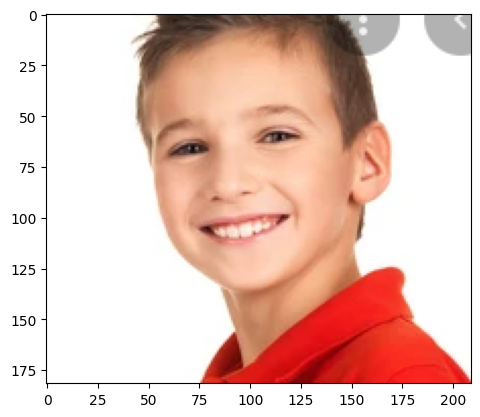

In [245]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [246]:
# crop the face to check the accuracy on it 
# we need face detection working on gray images so we convert the images into gray

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [247]:
# convert into a gray image
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [248]:
gray.shape

(182, 209)

In [249]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

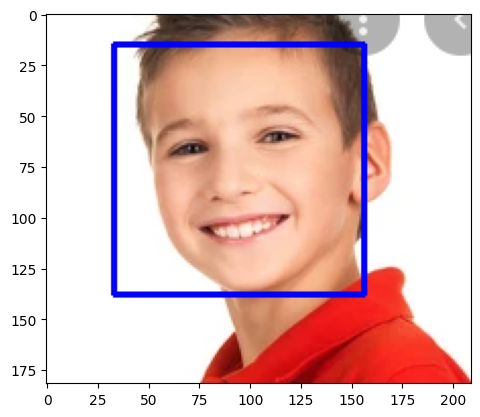

In [250]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [252]:
final_image = cv2.resize(frame, (224, 224))
final_image = np.expand_dims(final_image, axis =0)
final_image = final_image/255.0 #normalise

In [253]:
Prediction = new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [254]:
Prediction[0]

array([4.5065638e-03, 6.6324847e-06, 1.5277694e-05, 1.8580917e-06,
       1.0327912e-04, 9.8882616e-01, 6.5401341e-03], dtype=float32)

In [54]:
#Realtime Video Demo

import cv2

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in a box"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] -25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True: 
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in faces: 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis =0)
    final_image=final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(Predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif (np.argmax(Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(Predictions)==5):
        status = "sad"
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    elif (np.argmax(Predictions)==6):
        status = "surprise"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 + w1,y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:
        status = "Neutral"
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 +int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))
    
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
1/1 [==============================] - 1s 1s/step
Face not detected
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 64ms/step
Face not detected
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 60ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 64ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 73ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected


1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 94ms/step
Face not detected
1/1 [==============================] - 0s 87ms/step
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 93ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Fa

1/1 [==============================] - 0s 88ms/step
Face not detected
1/1 [==============================] - 0s 89ms/step
Face not detected
1/1 [==============================] - 0s 84ms/step
Face not detected
1/1 [==============================] - 0s 88ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
1/1 [==============================] - 0s 92ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 90ms/step
Face not detected
1/1 [==============================] - 0s 81ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 85ms/step
Face not detected
1/1 [==============================] - 0s 82ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 84ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 79ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 89ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
1/1 [==============================] - 0s 86ms/step
Face not detected
1/1 [==============================] - 0s 99ms/step
Face not detected
1/1 [==============================] - 0s 82ms/step
Face not detected
1/

In [ ]:
# convert from keras model to a model tensorjs can consume
tensorflowjs_converter --input_format keras ./mod_empathly_model_94p44.h5 ./tfjs_files